In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from mpl_toolkits.mplot3d import axes3d

In [0]:
sonar_data_url = "https://raw.githubusercontent.com/ducongo/mlcoursedataset/master/sonar.all-data.csv?token=AGNTW7UGTFBCVPFEKKHCTKS6I3J26"

In [0]:
columns_names = []

for i in range(1,62):
    if i == 61:
        columns_names.append(f'Label')
    else:
        columns_names.append(f'Angle{i}')

In [0]:
sonar_data = pd.read_csv(sonar_data_url, 
                  sep=',', 
                  names=columns_names)

In [0]:
'''
NOTE: There will be 3 instances where you have to choose a file to be uploaded.
      In order, they are:
        1. logisticregression.py
        2. kfold.py
        3. lda.py
      Make sure these files are stored somewhere on your computer.
      If you take too long to click "Choose File", just re-run the code and try again.
'''
from google.colab import files
src_logistic_reg = list(files.upload().values())[0] # Choose File: logisticregression.py
src_kfold = list(files.upload().values())[0] # Choose File: kfold.py
src_lda2 = list(files.upload().values())[0] # Choose File: lda.py

In [0]:
sonar_data.head()

,Angle1,Angle2,Angle3,Angle4,Angle5,Angle6,Angle7,Angle8,Angle9,Angle10,Angle11,Angle12,Angle13,Angle14,Angle15,Angle16,Angle17,Angle18,Angle19,Angle20,Angle21,Angle22,Angle23,Angle24,Angle25,Angle26,Angle27,Angle28,Angle29,Angle30,Angle31,Angle32,Angle33,Angle34,Angle35,Angle36,Angle37,Angle38,Angle39,Angle40,Angle41,Angle42,Angle43,Angle44,Angle45,Angle46,Angle47,Angle48,Angle49,Angle50,Angle51,Angle52,Angle53,Angle54,Angle55,Angle56,Angle57,Angle58,Angle59,Angle60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [0]:
sonar_data.values.shape

(208, 61)

##Sonar data exploration

In [0]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
Angle1     208 non-null float64
Angle2     208 non-null float64
Angle3     208 non-null float64
Angle4     208 non-null float64
Angle5     208 non-null float64
Angle6     208 non-null float64
Angle7     208 non-null float64
Angle8     208 non-null float64
Angle9     208 non-null float64
Angle10    208 non-null float64
Angle11    208 non-null float64
Angle12    208 non-null float64
Angle13    208 non-null float64
Angle14    208 non-null float64
Angle15    208 non-null float64
Angle16    208 non-null float64
Angle17    208 non-null float64
Angle18    208 non-null float64
Angle19    208 non-null float64
Angle20    208 non-null float64
Angle21    208 non-null float64
Angle22    208 non-null float64
Angle23    208 non-null float64
Angle24    208 non-null float64
Angle25    208 non-null float64
Angle26    208 non-null float64
Angle27    208 non-null float64
Angle28    208 non-null float64

In [0]:
sonar_data.describe()

,Angle1,Angle2,Angle3,Angle4,Angle5,Angle6,Angle7,Angle8,Angle9,Angle10,Angle11,Angle12,Angle13,Angle14,Angle15,Angle16,Angle17,Angle18,Angle19,Angle20,Angle21,Angle22,Angle23,Angle24,Angle25,Angle26,Angle27,Angle28,Angle29,Angle30,Angle31,Angle32,Angle33,Angle34,Angle35,Angle36,Angle37,Angle38,Angle39,Angle40,Angle41,Angle42,Angle43,Angle44,Angle45,Angle46,Angle47,Angle48,Angle49,Angle50,Angle51,Angle52,Angle53,Angle54,Angle55,Angle56,Angle57,Angle58,Angle59,Angle60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.

In [0]:
sonar_data['Label'] = sonar_data['Label'].map({'R': 0, 'positive': 1, 'M': 1})

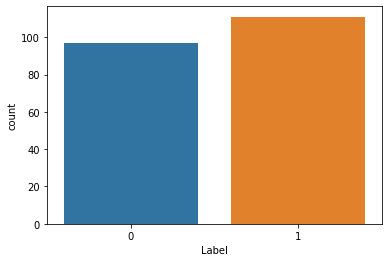

In [0]:
sns.countplot(x="Label", data=sonar_data)

There's a good distribution between Rs and Mshence the model will be less bias on this dataset

In [0]:
sonar_data.isnull()

,Angle1,Angle2,Angle3,Angle4,Angle5,Angle6,Angle7,Angle8,Angle9,Angle10,Angle11,Angle12,Angle13,Angle14,Angle15,Angle16,Angle17,Angle18,Angle19,Angle20,Angle21,Angle22,Angle23,Angle24,Angle25,Angle26,Angle27,Angle28,Angle29,Angle30,Angle31,Angle32,Angle33,Angle34,Angle35,Angle36,Angle37,Angle38,Angle39,Angle40,Angle41,Angle42,Angle43,Angle44,Angle45,Angle46,Angle47,Angle48,Angle49,Angle50,Angle51,Angle52,Angle53,Angle54,Angle55,Angle56,Angle57,Angle58,Angle59,Angle60,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [0]:
sonar_data.isnull().sum()

Angle1     0
Angle2     0
Angle3     0
Angle4     0
Angle5     0
          ..
Angle57    0
Angle58    0
Angle59    0
Angle60    0
Label      0
Length: 61, dtype: int64

## Finding the best features to use from this dataset
There's too many features we don't perhaps need. We are going to see which one are correlated and perform PCS i order to find the best features that will determine the output of our inputs

Text(0, 0.5, 'Angle9')

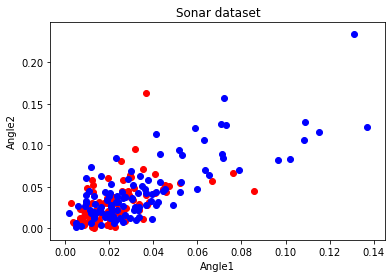

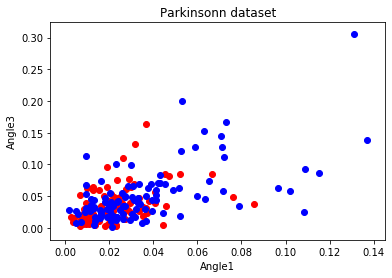

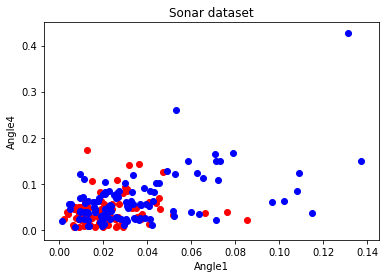

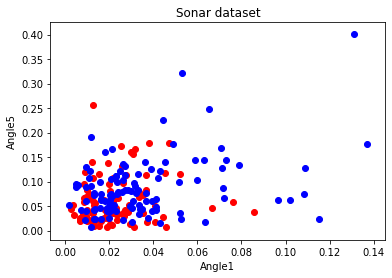

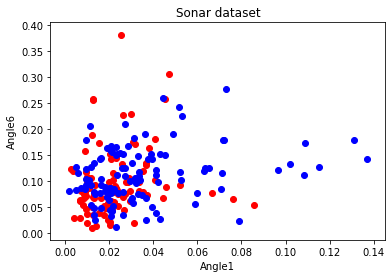

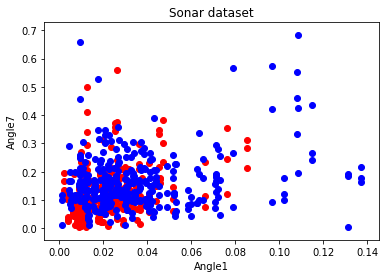

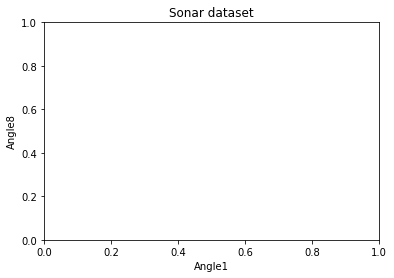

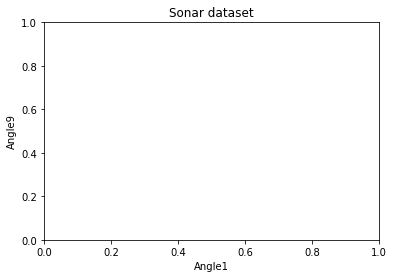

In [0]:
colors = {0:'r', 1:'b'}
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()

data = sonar_data
# plot each data-point
for i in range(len(data['Angle1'])):
    ax.scatter(data['Angle1'][i], data['Angle2'][i],color=colors[data['Label'][i]])
    ax2.scatter(data['Angle1'][i], data['Angle3'][i],color=colors[data['Label'][i]])
    ax3.scatter(data['Angle1'][i], data['Angle4'][i],color=colors[data['Label'][i]])
    ax4.scatter(data['Angle1'][i], data['Angle5'][i],color=colors[data['Label'][i]])
    ax5.scatter(data['Angle1'][i], data['Angle6'][i],color=colors[data['Label'][i]])
    ax6.scatter(data['Angle1'][i], data['Angle7'][i],color=colors[data['Label'][i]])
    ax6.scatter(data['Angle1'][i], data['Angle8'][i],color=colors[data['Label'][i]])
    ax6.scatter(data['Angle1'][i], data['Angle9'][i],color=colors[data['Label'][i]])
# set a title and labels
ax.set_title('Sonar dataset')
ax.set_xlabel('Angle1')
ax.set_ylabel('Angle2')

ax2.set_title('Parkinsonn dataset')
ax2.set_xlabel('Angle1')
ax2.set_ylabel('Angle3')

ax3.set_title('Sonar dataset')
ax3.set_xlabel('Angle1')
ax3.set_ylabel('Angle4')

ax4.set_title('Sonar dataset')
ax4.set_xlabel('Angle1')
ax4.set_ylabel('Angle5')

ax5.set_title('Sonar dataset')
ax5.set_xlabel('Angle1')
ax5.set_ylabel('Angle6')

ax6.set_title('Sonar dataset')
ax6.set_xlabel('Angle1')
ax6.set_ylabel('Angle7')

ax7.set_title('Sonar dataset')
ax7.set_xlabel('Angle1')
ax7.set_ylabel('Angle8')

ax8.set_title('Sonar dataset')
ax8.set_xlabel('Angle1')
ax8.set_ylabel('Angle9')

## Using correlation to determine which features to keep

In [0]:
corr = sonar_data.corr()

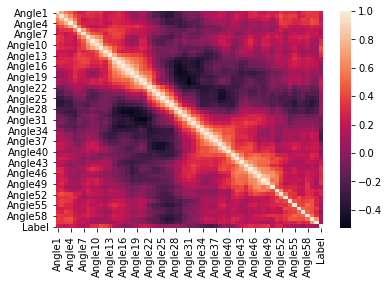

In [0]:
sns.heatmap(corr)

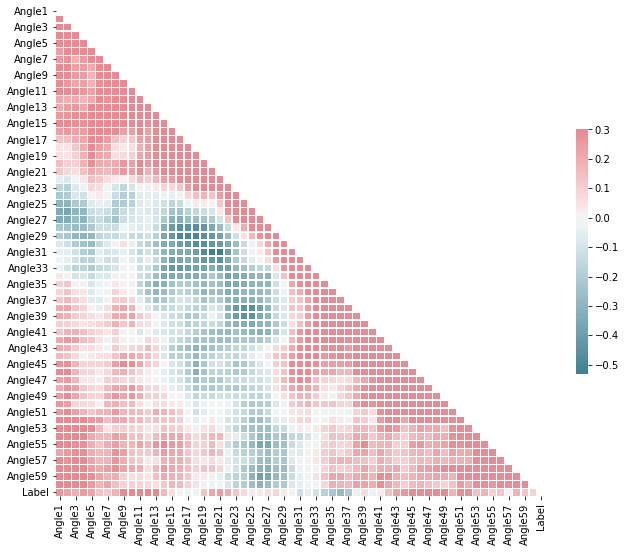

In [0]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# a better visual representation of the correlation found within the dataset
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f0, ax0 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
#removing column 1
# data = sonar_data.drop(columns="name")
selected_columns = data.columns[columns]
data = data[selected_columns]

In [0]:
selected_columns = selected_columns[: len(selected_columns) - 1].values

In [0]:
corr.shape

(61, 61)

In [0]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        # regressor_OLS = sm.OLS(Y, x).fit()
        regressor_OLS = sm.OLS(endog=Y, exog=x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,:len(data.columns) - 1].values, data.iloc[:,len(data.columns) - 1].values, SL, selected_columns)

In [0]:
result = pd.DataFrame()
result['Label'] = data.iloc[:,len(data.columns) - 1]

In [0]:
result.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [0]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [0]:
corr = data.corr()

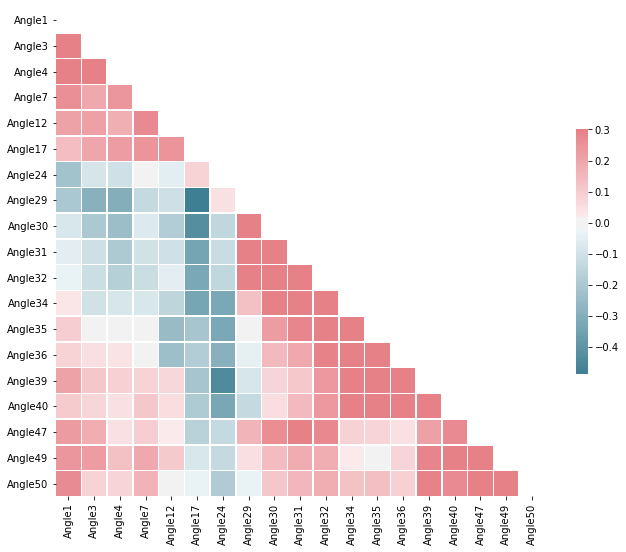

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f0, ax0 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

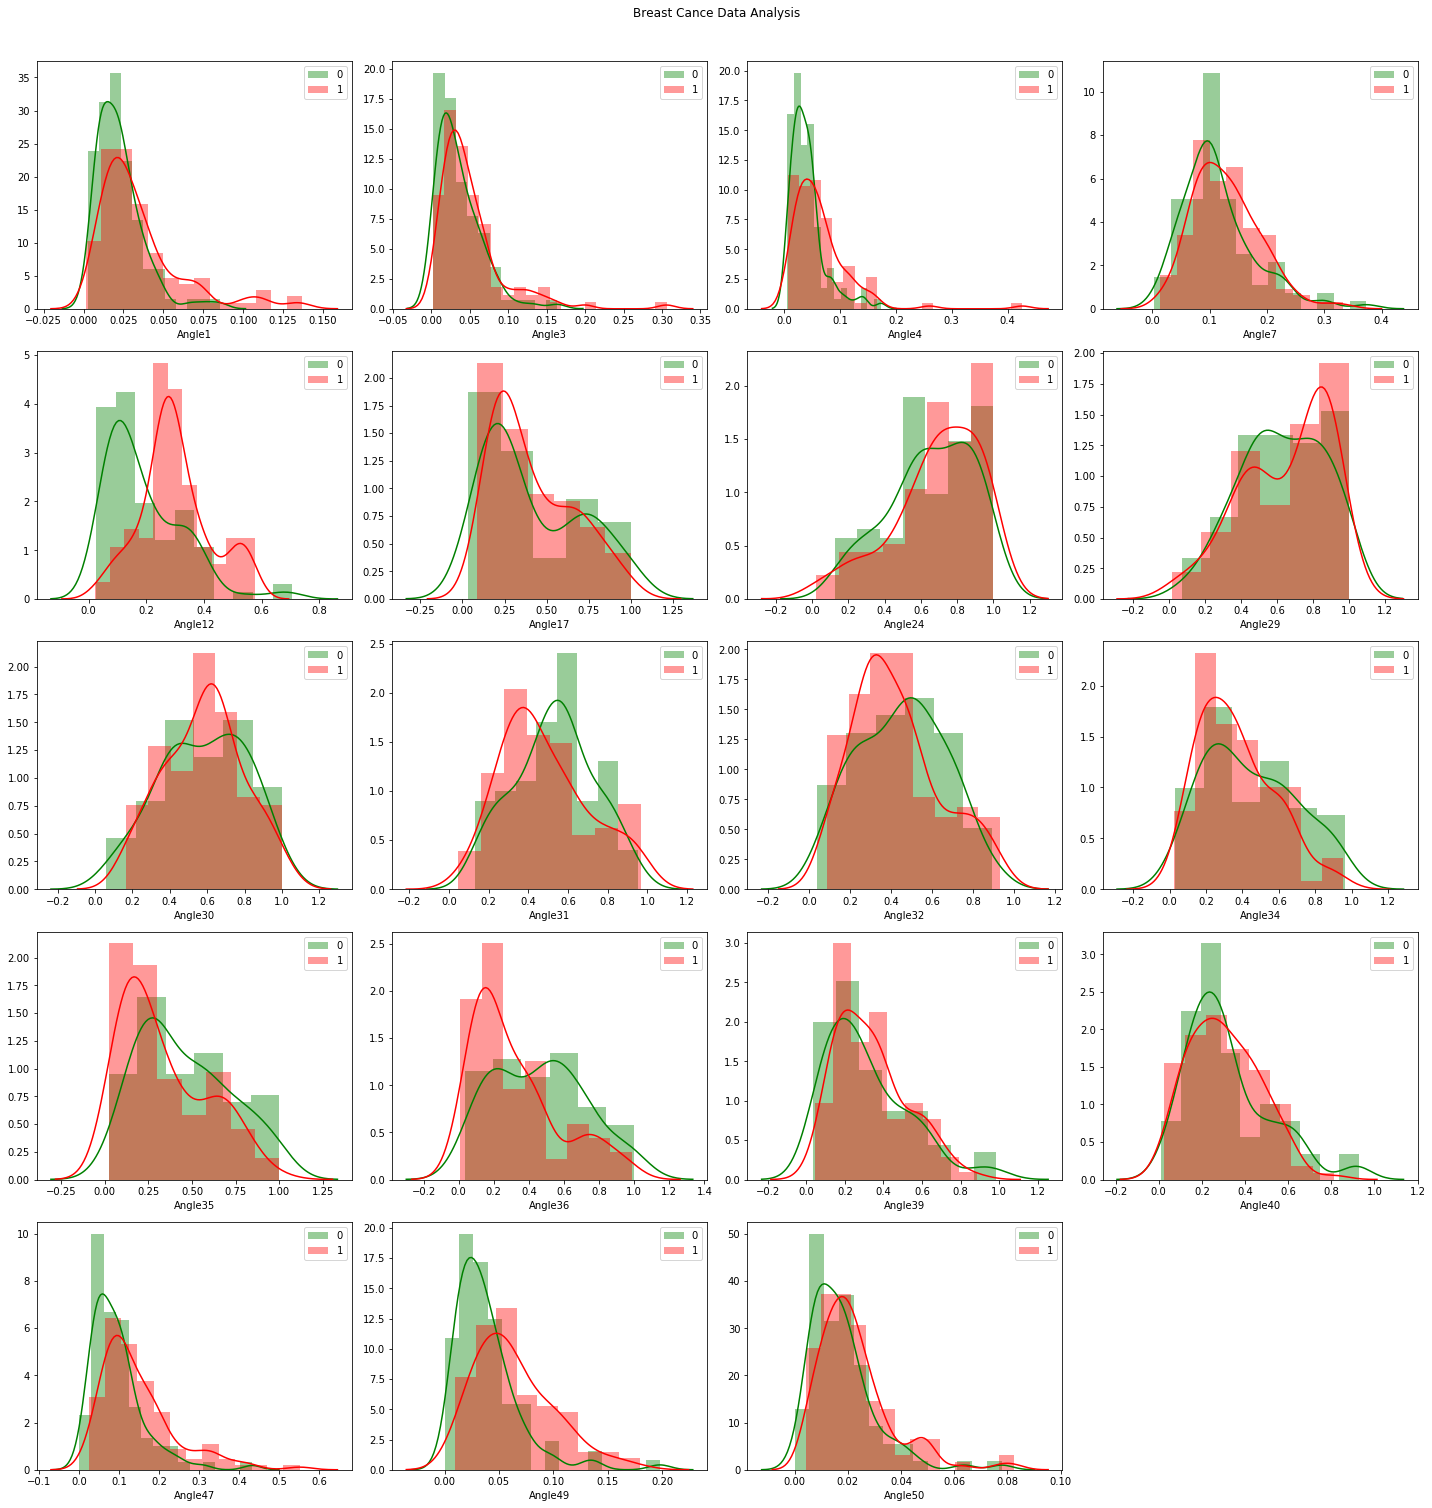

In [0]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['Label']==0], color='g', label = '0')
    sns.distplot(data[i][result['Label']==1], color='r', label = '1')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##Training time - Logistic Regression

In [0]:
#from google.colab import files

In [0]:
!ls

sample_data


In [0]:
# !rm 'lda (1).py'

In [0]:
#src_logistic_reg = list(files.upload().values())[0]

Saving logisticregression.py to logisticregression.py


In [0]:
#src_kfold = list(files.upload().values())[0]

Saving kfold.py to kfold.py


In [0]:
open('logisticregression.py','wb').write(src_logistic_reg)
import logisticregression as lgor

In [0]:
open('kfold.py','wb').write(src_kfold)
import kfold as my_kf

In [0]:
X = np.float128(data.iloc[:,:].values)
y = sonar_data["Label"].values

X_no_shuffle = np.float128(data.iloc[:,:].values)
y_no_shuffle = sonar_data["Label"].values

In [0]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [0]:
train_indexes, test_indexes = None, None

In [0]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X_no_shuffle = preprocessing.normalize(X_no_shuffle)

In [0]:
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
thresholding = 0.5
num_iter = 300000

In [0]:
kf_split = my_kf.KFold(n_splits=10)
cross_val_indexes = list(kf_split.split(y))

In [0]:

print('         Shuffled data')
scores_logistic = []
for lr in learning_rates:
    print(f'Learning rate: {lr}')
    scores = []
    losses = []
    model = lgor.LogisticRegression(learningRate=lr, num_iter=num_iter)
    %timeit
    for index, (train, test) in enumerate(cross_val_indexes):
        print(f'Fold {index + 1}')
        train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])
        train_y = np.take(y, train)
        print('Training......')
        %time loss = model.fit(train_x, train_y)

        test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])
        test_y = np.take(y, test)

        print('Testing......')
        %time accuracy = model.accu_eval(model.predict(test_x, 0.5), test_y)
        print(f'Accuracy: {accuracy}')
        scores.append(accuracy)
        losses.append(loss)
    scores_logistic.append({
        'learning_rate': lr,
        'scores' : scores,
        'loss' : losses
    })
    print('--------------------------------------------------------------------')

         Shuffled data
Learning rate: 1e-06
Fold 1
Training......
loss : 0.6924894988124082 	
CPU times: user 6.92 s, sys: 28.8 ms, total: 6.94 s
Wall time: 6.96 s
Testing......
CPU times: user 192 µs, sys: 0 ns, total: 192 µs
Wall time: 159 µs
Accuracy: 60.0
Fold 2
Training......
loss : 0.6920256185122704 	
CPU times: user 6.81 s, sys: 30.9 ms, total: 6.84 s
Wall time: 6.85 s
Testing......
CPU times: user 180 µs, sys: 5 µs, total: 185 µs
Wall time: 156 µs
Accuracy: 45.0
Fold 3
Training......
loss : 0.6924550647868336 	
CPU times: user 6.82 s, sys: 33.8 ms, total: 6.85 s
Wall time: 6.87 s
Testing......
CPU times: user 189 µs, sys: 5 µs, total: 194 µs
Wall time: 161 µs
Accuracy: 60.0
Fold 4
Training......
loss : 0.6924036144695017 	
CPU times: user 6.74 s, sys: 20.8 ms, total: 6.76 s
Wall time: 6.78 s
Testing......
CPU times: user 183 µs, sys: 5 µs, total: 188 µs
Wall time: 155 µs
Accuracy: 60.0
Fold 5
Training......
loss : 0.6921663596476689 	
CPU times: user 6.77 s, sys: 26.9 ms, tota

In [0]:
print('         Unshuffled data')
scores_logistic_no_shuffle = []
for lr in learning_rates:
    print(f'Learning rate: {lr}')
    scores = []
    losses = []
    model = lgor.LogisticRegression(learningRate=lr, num_iter=num_iter)
    %timeit
    for index, (train, test) in enumerate(cross_val_indexes):
        print(f'Fold {index + 1}')
        train_x = np.column_stack([np.take(X_no_shuffle[:,i], train) for i in range(0, X_no_shuffle.shape[1])])
        train_y = np.take(y_no_shuffle, train)
        print('Training......')
        %time loss = model.fit(train_x, train_y)

        test_x = np.column_stack([np.take(X_no_shuffle[:,i], test) for i in range(0, X_no_shuffle.shape[1])])
        test_y = np.take(y_no_shuffle, test)

        print('Testing......')
        %time accuracy = model.accu_eval(model.predict(test_x, 0.5), test_y)
        print(f'Accuracy: {accuracy}')
        scores.append(accuracy)
        losses.append(loss)
    scores_logistic_no_shuffle.append({
        'learning_rate': lr,
        'scores' : scores,
        'loss' : losses
    })
    print('--------------------------------------------------------------------')

         Unshuffled data
Learning rate: 1e-06
Fold 1
Training......
loss : 0.688914186255882 	
CPU times: user 6.89 s, sys: 28.9 ms, total: 6.92 s
Wall time: 6.93 s
Testing......
CPU times: user 106 µs, sys: 2 µs, total: 108 µs
Wall time: 112 µs
Accuracy: 0.0
Fold 2
Training......
loss : 0.688923905306034 	
CPU times: user 6.71 s, sys: 26 ms, total: 6.73 s
Wall time: 6.74 s
Testing......
CPU times: user 0 ns, sys: 165 µs, total: 165 µs
Wall time: 175 µs
Accuracy: 0.0
Fold 3
Training......
loss : 0.6889091289936443 	
CPU times: user 6.85 s, sys: 30.9 ms, total: 6.88 s
Wall time: 6.89 s
Testing......
CPU times: user 213 µs, sys: 0 ns, total: 213 µs
Wall time: 179 µs
Accuracy: 0.0
Fold 4
Training......
loss : 0.6889115378513905 	
CPU times: user 6.96 s, sys: 35.9 ms, total: 7 s
Wall time: 7.01 s
Testing......
CPU times: user 207 µs, sys: 4 µs, total: 211 µs
Wall time: 133 µs
Accuracy: 0.0
Fold 5
Training......
loss : 0.6900798617840056 	
CPU times: user 6.92 s, sys: 35 ms, total: 6.95 s
W

In [0]:
import statistics 

In [0]:
max_accuracy = [max(score["scores"]) for score in scores_logistic]
average_accuracy = [statistics.mean(score["scores"]) for score in scores_logistic]
min_accuracy = [min(score["scores"]) for score in scores_logistic]

max_accuracy_no_shuffle = [max(score["scores"]) for score in scores_logistic_no_shuffle]
average_accuracy_no_shuffle = [statistics.mean(score["scores"]) for score in scores_logistic_no_shuffle]
min_accuracy_no_shuffle = [min(score["scores"]) for score in scores_logistic_no_shuffle]

max_loss = [max(score["loss"]) for score in scores_logistic]
average_loss = [statistics.mean(score["loss"]) for score in scores_logistic]
min_loss = [min(score["loss"]) for score in scores_logistic]

max_loss_no_shuffle = [max(score["loss"]) for score in scores_logistic_no_shuffle]
average_loss_no_shuffle = [statistics.mean(score["loss"]) for score in scores_logistic_no_shuffle]
min_loss_no_shuffle = [min(score["loss"]) for score in scores_logistic_no_shuffle]

In [0]:
print(f'Learning rates {learning_rates}')
print(f'Maximum loss: {max_loss}')
print(f'Minimum loss: {min_loss}')
print(f'Average loss: {average_loss}')

print(f'Maximum loss (no shuffle): {max_loss_no_shuffle}')
print(f'Minimum loss (no shuffle): {min_loss_no_shuffle}')
print(f'Average loss (no shuffle): {average_loss_no_shuffle}')

print(f'Maximum accuracy: {max_accuracy}')
print(f'Minimum accuracy: {min_accuracy}')
print(f'Average accuracy: {average_accuracy}')

print(f'Maximum accuracy (no shuffle): {max_accuracy_no_shuffle}')
print(f'Minimum accuracy (no shuffle): {min_accuracy_no_shuffle}')
print(f'Average accuracy (no shuffle): {average_accuracy_no_shuffle}')


Learning rates [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
Maximum loss: [0.6927189759934929, 0.6897337271236464, 0.6682197490086804, 0.5904322092754566, 0.47076484869507823, 0.36967022901475677]
Minimum loss: [0.6914141035507531, 0.6842818878219422, 0.6559840606494383, 0.549150289275354, 0.4177482876857034, 0.3294510118967412]
Average loss: [0.692219759269616, 0.6875750679714626, 0.6637066601577866, 0.57862260562711, 0.45535906113586916, 0.3518746892690758]
Maximum loss (no shuffle): [0.6926797047508398, 0.6892275668662519, 0.6692367766068681, 0.6036216900887033, 0.47902933267125, 0.37182668261523716]
Minimum loss (no shuffle): [0.6889091289936443, 0.6744509059872619, 0.6459007950503615, 0.5357458804205268, 0.4037057504736456, 0.315154582143595]
Average loss (no shuffle): [0.6908361868464287, 0.6820660466896307, 0.6566537425767666, 0.5697952848887146, 0.44644992037658554, 0.3434810014605157]
Maximum accuracy: [64.28571428571429, 64.28571428571429, 78.57142857142857, 80.0, 95.0, 95.0]
Min

In [0]:
max_accuracy

[64.28571428571429, 64.28571428571429, 78.57142857142857, 80.0, 95.0, 95.0]

In [0]:
max_accuracy_no_shuffle

[15.0, 15.0, 65.0, 70.0, 85.71428571428571, 95.0]

In [0]:
average_accuracy_no_shuffle

[1.5, 1.5, 15.0, 41.07142857142857, 56.57142857142857, 68.0]

In [0]:
average_accuracy

[52.92857142857143,
 52.92857142857143,
 59.35714285714286,
 64.64285714285714,
 74.0,
 80.21428571428571]

In [0]:
average_accuracy_no_shuffle

[1.5, 1.5, 15.0, 41.07142857142857, 56.57142857142857, 68.0]

In [0]:
min_accuracy

[35.0, 35.0, 35.0, 40.0, 50.0, 60.0]

In [0]:
min_accuracy_no_shuffle

[0.0, 0.0, 0.0, 20.0, 30.0, 40.0]

In [0]:
scores_logistic

[{'learning_rate': 1e-06,
  'loss': [0.6924894988124082,
   0.6920256185122704,
   0.6924550647868336,
   0.6924036144695017,
   0.6921663596476689,
   0.6923775076882919,
   0.6914141035507531,
   0.6917860008208855,
   0.6923608484140543,
   0.6927189759934929],
  'scores': [60.0,
   45.0,
   60.0,
   60.0,
   50.0,
   60.0,
   35.0,
   40.0,
   55.00000000000001,
   64.28571428571429]},
 {'learning_rate': 1e-05,
  'loss': [0.6886854241502455,
   0.6872151035140264,
   0.6884144365697126,
   0.6879591278657217,
   0.6873668852370466,
   0.6875340310671472,
   0.6842818878219422,
   0.6862598515909287,
   0.6883002047742094,
   0.6897337271236464],
  'scores': [60.0,
   45.0,
   60.0,
   60.0,
   50.0,
   60.0,
   35.0,
   40.0,
   55.00000000000001,
   64.28571428571429]},
 {'learning_rate': 0.0001,
  'loss': [0.6658986839311564,
   0.6669193503555025,
   0.6634299271711279,
   0.6609190621821219,
   0.6636861291737739,
   0.6559840606494383,
   0.6588542196055863,
   0.6664495091841

##Training time - LDA

In [0]:
#src_lda2 = list(files.upload().values())[0]

Saving lda.py to lda.py


In [0]:
open('lda3.py','wb').write(src_lda2)
import lda3 as mylda

In [0]:
model2 = mylda.LDA(np.array(X), np.array(y))
prediction2 = model2.predict(model2.xData)
model2.accu_eval(prediction2, model2.yData)

85.09615384615384

In [0]:
%%time
print('         Shuffled data')
scores_lda = []

for index, (train, test) in enumerate(cross_val_indexes):
    print(f'Fold {index + 1}')
    train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])
    train_y = np.take(y, train)
    
    print('Training......')
    %time lda_model = mylda.LDA(np.array(train_x), np.array(train_y))

    test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])
    test_y = np.take(y, test)
    print('Training......')
    %time accuracy = lda_model.accu_eval(lda_model.predict(test_x), test_y)

    print(f'Accuracy: {accuracy}')
    scores_lda.append(accuracy)
    print('--------------------------------------------------------------------')

         Shuffled data
Fold 1
Training......
CPU times: user 3.38 ms, sys: 0 ns, total: 3.38 ms
Wall time: 3.4 ms
Training......
CPU times: user 1.89 ms, sys: 998 µs, total: 2.89 ms
Wall time: 1.51 ms
Accuracy: 80.0
--------------------------------------------------------------------
Fold 2
Training......
CPU times: user 6.14 ms, sys: 3.02 ms, total: 9.16 ms
Wall time: 4.59 ms
Training......
CPU times: user 1.89 ms, sys: 1.02 ms, total: 2.91 ms
Wall time: 1.46 ms
Accuracy: 75.0
--------------------------------------------------------------------
Fold 3
Training......
CPU times: user 4.94 ms, sys: 5 ms, total: 9.94 ms
Wall time: 4.98 ms
Training......
CPU times: user 1.87 ms, sys: 1.02 ms, total: 2.88 ms
Wall time: 1.45 ms
Accuracy: 80.0
--------------------------------------------------------------------
Fold 4
Training......
CPU times: user 4.85 ms, sys: 3.98 ms, total: 8.82 ms
Wall time: 4.41 ms
Training......
CPU times: user 1.77 ms, sys: 1.01 ms, total: 2.78 ms
Wall time: 1.39 ms
A

In [0]:
%%time
print('         Unshuffled data')
scores_lda_no_shuffle = []

for index, (train, test) in enumerate(cross_val_indexes):
    print(f'Fold {index + 1}')
    train_x = np.column_stack([np.take(X_no_shuffle[:,i], train) for i in range(0, X_no_shuffle.shape[1])])
    train_y = np.take(y_no_shuffle, train)
    
    print('Training......')
    %time lda_model = mylda.LDA(np.array(train_x), np.array(train_y))

    test_x = np.column_stack([np.take(X_no_shuffle[:,i], test) for i in range(0, X_no_shuffle.shape[1])])
    test_y = np.take(y_no_shuffle, test)
    print('Training......')
    %time accuracy = lda_model.accu_eval(lda_model.predict(test_x), test_y)

    print(f'Accuracy: {accuracy}')
    scores_lda_no_shuffle.append(accuracy)
    print('--------------------------------------------------------------------')

         Unshuffled data
Fold 1
Training......
CPU times: user 3.84 ms, sys: 971 µs, total: 4.81 ms
Wall time: 4.91 ms
Training......
CPU times: user 2.43 ms, sys: 1.01 ms, total: 3.44 ms
Wall time: 2.02 ms
Accuracy: 70.0
--------------------------------------------------------------------
Fold 2
Training......
CPU times: user 8.03 ms, sys: 4 ms, total: 12 ms
Wall time: 6.08 ms
Training......
CPU times: user 2.91 ms, sys: 998 µs, total: 3.91 ms
Wall time: 2.01 ms
Accuracy: 70.0
--------------------------------------------------------------------
Fold 3
Training......
CPU times: user 6.71 ms, sys: 3.03 ms, total: 9.74 ms
Wall time: 5.57 ms
Training......
CPU times: user 1.45 ms, sys: 1.99 ms, total: 3.44 ms
Wall time: 1.79 ms
Accuracy: 85.0
--------------------------------------------------------------------
Fold 4
Training......
CPU times: user 4.66 ms, sys: 4.99 ms, total: 9.65 ms
Wall time: 4.89 ms
Training......
CPU times: user 2.29 ms, sys: 986 µs, total: 3.28 ms
Wall time: 1.7 ms


In [0]:
max_accuracy_lda = max(scores_lda)
min_accuracy_lda = min(scores_lda)
average_accuracy_lda = statistics.mean(scores_lda)

max_accuracy_lda_no_shuffle = max(scores_lda_no_shuffle)
min_accuracy_lda_no_shuffle = min(scores_lda_no_shuffle)
average_accuracy_lda_no_shuffle = statistics.mean(scores_lda_no_shuffle)

In [0]:
print(f'Maximum accuracy: {max_accuracy_lda}')
print(f'Minimum accuracy: {min_accuracy_lda}')
print(f'Average accuracy: {average_accuracy_lda}')

print(f'Maximum accuracy (no shuffle): {max_accuracy_lda_no_shuffle}')
print(f'Minimum accuracy (no shuffle): {min_accuracy_lda_no_shuffle}')
print(f'Average accuracy (no shuffle): {average_accuracy_lda_no_shuffle}')

Maximum accuracy: 95.0
Minimum accuracy: 65.0
Average accuracy: 80.71428571428571
Maximum accuracy (no shuffle): 85.71428571428571
Minimum accuracy (no shuffle): 55.00000000000001
Average accuracy (no shuffle): 70.57142857142857


In [0]:
max_accuracy_lda

90.0

In [0]:
max_accuracy_lda_no_shuffle

In [0]:
min_accuracy_lda

65.0

In [0]:
min_accuracy_lda_no_shuffle

In [0]:
average_accuracy_lda

79.07142857142857

In [0]:
average_accuracy_lda_no_shuffle

##Testing using all the features

In [0]:
model = lgor.LogisticRegression(learningRate=0.0001, num_iter=300000)
%time model.fit(X, y)

loss : 0.6646094903742058 	
CPU times: user 6.52 s, sys: 23.9 ms, total: 6.54 s
Wall time: 6.54 s


0.6646094903742058

In [0]:
model.accu_eval(model.predict(X, 0.5), y)

62.5

In [0]:
'''
%%time
kf_split = my_kf.KFold(n_splits=10)
for train, test in kf_split.split(y):
    
    train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])
    train_y = np.take(y, train)

    model = lgor.LogisticRegression(learningRate=0.1, num_iter=300000)
    model.fit(train_x, train_y)

    test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])
    test_y = np.take(y, test)
    scores_logistic.append(model.accu_eval(model.predict(test_x, 0.5), test_y))
    
    print(len(train), len(test))
'''

'\n%%time\nkf_split = my_kf.KFold(n_splits=10)\nfor train, test in kf_split.split(y):\n    \n    train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])\n    train_y = np.take(y, train)\n\n    model = lgor.LogisticRegression(learningRate=0.1, num_iter=300000)\n    model.fit(train_x, train_y)\n\n    test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])\n    test_y = np.take(y, test)\n    scores_logistic.append(model.accu_eval(model.predict(test_x, 0.5), test_y))\n    \n    print(len(train), len(test))\n'